<center><h1>Prueba 2</h1></center>

## Preliminares

### Enunciado

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El
dataset es llamado stop_and_frisk_data y contiene información sobre interrogaciones y
detenciones realizadas por le departamento de policia de NY en la vía pública. El diccionario de
atributos se encuentra en el archivo 2009 SQF File Spec.xlsx .
Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de
entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos
que estamos utilizando son un muestreo del de la cantidad de registros reales que contiene el
dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento
que requiere el volumén de datos reales.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivos
auxiliares y csv).
* Una vez terminada la prueba, comprime la carpeta y sube el .zip a la sección
correspondiente.

<div style="background-color:yellow; padding:20px; border-radius:10px">
<b>Vector objetivo</b>: Probabilidad de ser arrestado en base a la clasificación de 'arstmade'
</div>

<div style="background-color:yellow; padding:20px; border-radius:10px">
<b>Tipo de Problema</b>: Problema de clasificación con información previa sobre el comportamiento de ciertas carácterísticas de un individuo o probabilidades a priori de ser arrestado
</div>

<div style="background-color:yellow; padding:20px; border-radius:10px">
<b>Tipo de Solución</b>: Grilla de búsqueda con hiperparámetros con los al menos 5 modelos como sigue:
    <ul>
        <li>BernoulliNB</li>
        <li>MultinomialNB</li>
        <li>LinearDiscriminantAnalysis</li>
        <li>QuadraticDiscriminantAnalysis</li>
        <li>GradientBoostingClassifier</li>
    </ul>
</div>

<div style="background-color:yellow; padding:20px; border-radius:10px">
<b>Métricas de desempeño</b>:
    <ul>
        <li>recall</li>
        <li>accuracy</li>
        <li>f1_score</li>
        <li>ROC</li>
    </ul>
</div>

## Aspectos Computacionales

<div style="background-color:yellow; padding:20px; border-radius:10px">
En cuanto a los aspectos computacionales, las librerias de trabajo serán:
<br><li><b>pandas</b>, para el manejo de data frames
<br><li><b>numpy</b>, para el manejo de algunas funciones como where u otras medidas de tendencia central
<br><li><b>matplotlib y seaborn</b>, para representar visualmente algunas hipotesis y/o conclusiones
<br><li><b>helpers</b>, como un modulo desarrollado para agilizar algunas funciones
<br><li><b>sklearn.linear_model</b>, para la regresión logistica desde el machine learning
<br><li><b>sklearn.model_selection</b>, para splitear la base de datos
<li><b>pipeline</b>, para ordenar los metodos estadisticos aplicados a los datos</li>
<li><b>GridSearchCV</b>, para ingresar los medelos seleccionados y realizar validacion cruzada</li>
<li><b>train_test_split</b>, para separar una muestra de hold out y validar nuestros modelos</li>
<li><b>sklearn.metrics</b>, para medir el desempeño de nuestros modelos de clasificacion</li>
</div>

In [77]:
# Manipulación de datos y representaciones gráficas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msngo
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn')
from sklearn.naive_bayes import BernoulliNB, MultinomialNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Análisis Exploratorio

<div style="background-color:yellow; padding:20px; border-radius:10px">
Se debe analizar el comportamiento del vector objetivo.
        <ul>
            <li>Se debe reportar el patrón de datos perdidos. (1 punto)</li>
            <li>Se debe implementar recodificaciones para el vector objetivo. (2 puntos)</li>
            <li>Definir el tipo de modelo a implementar para generar una predicción de arresto, así como su grilla de hiperparámetros.</li>
            <li>Definir la recodificación del vector objetivo para generar una predicción de acción violenta
en el procedimiento.</li>
            <li>Implementar el script preproc_nyc_sqf.py para igualar la cantidad de atributos en el
benchmark.</li>
        </ul>
</div>

In [3]:
base = pd.read_csv('2009_1perc.csv').drop(columns=['Unnamed: 0'])

In [7]:
base.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [14]:
base.columns

Index(['year', 'pct', 'ser_num', 'datestop', 'timestop', 'recstat', 'inout',
       'trhsloc', 'perobs', 'crimsusp',
       ...
       'zip', 'addrpct', 'sector', 'beat', 'post', 'xcoord', 'ycoord',
       'dettypcm', 'linecm', 'detailcm'],
      dtype='object', length=111)

In [68]:
import preproc_nyc_sqf as helpers
df = helpers.create_suitable_dataframe(base)[0]

['year', 'pct', 'ser_num', 'datestop', 'timestop', 'perstop', 'compyear', 'comppct', 'repcmd', 'revcmd', 'dob', 'age', 'ht_feet', 'ht_inch', 'weight', 'addrpct', 'linecm', 'detailcm', 'month', 'perobs', 'meters', 'age_individual']


In [69]:
df.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,frisked,...,race,haircolr,eyecolor,build,city,sector,beat,post,month,meters
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BRONX,G,7,,4,1.798320
2,1,O,P,V,Y,N,N,N,N,Y,...,Q,BR,BR,M,BRONX,E,U,,10,1.920240
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,J,4,35,12,1.676400
5,1,I,T,V,Y,N,N,N,N,Y,...,B,BK,BR,M,MANHATTAN,F,16,,5,1.767840
6,1,O,P,P,Y,N,N,N,Y,Y,...,B,BK,BR,T,BROOKLYN,N,U,,11,1.557528


<Figure size 288x288 with 0 Axes>

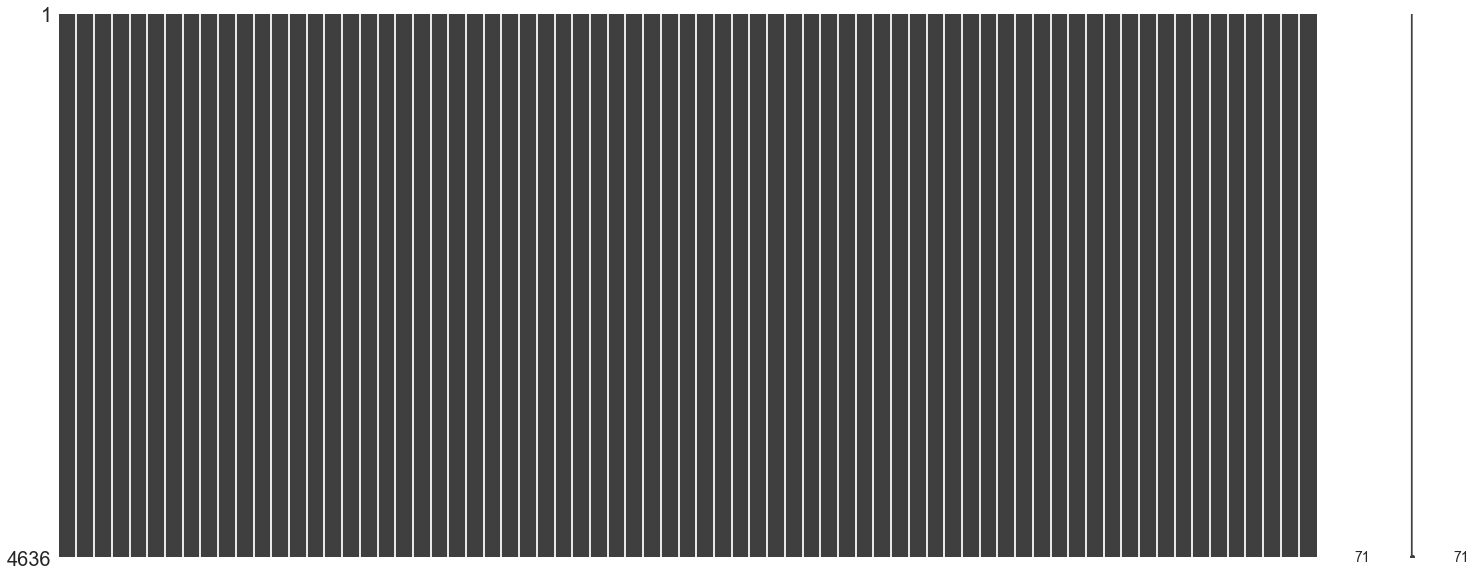

In [70]:
plt.figure(figsize=(4,4))
msngo.matrix(df)

No hay datos perdidos.

### Atributos no categóricos

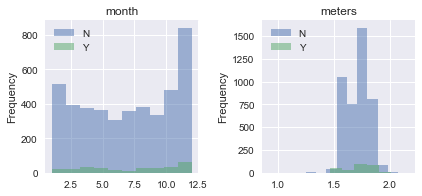

In [71]:
plt.subplots(figsize= (15, 25))
num_cols = new_base.select_dtypes(exclude=['object']).columns
for n, i in enumerate(df.drop(columns=['arstmade'])[num_cols].columns):
    plt.subplot(10, 5, n + 1)
    df.groupby('arstmade')[i].plot(kind='hist', alpha=.5)
    plt.legend(df['arstmade'].unique())
    plt.title(i)
    plt.tight_layout()

### Atributos categóricos

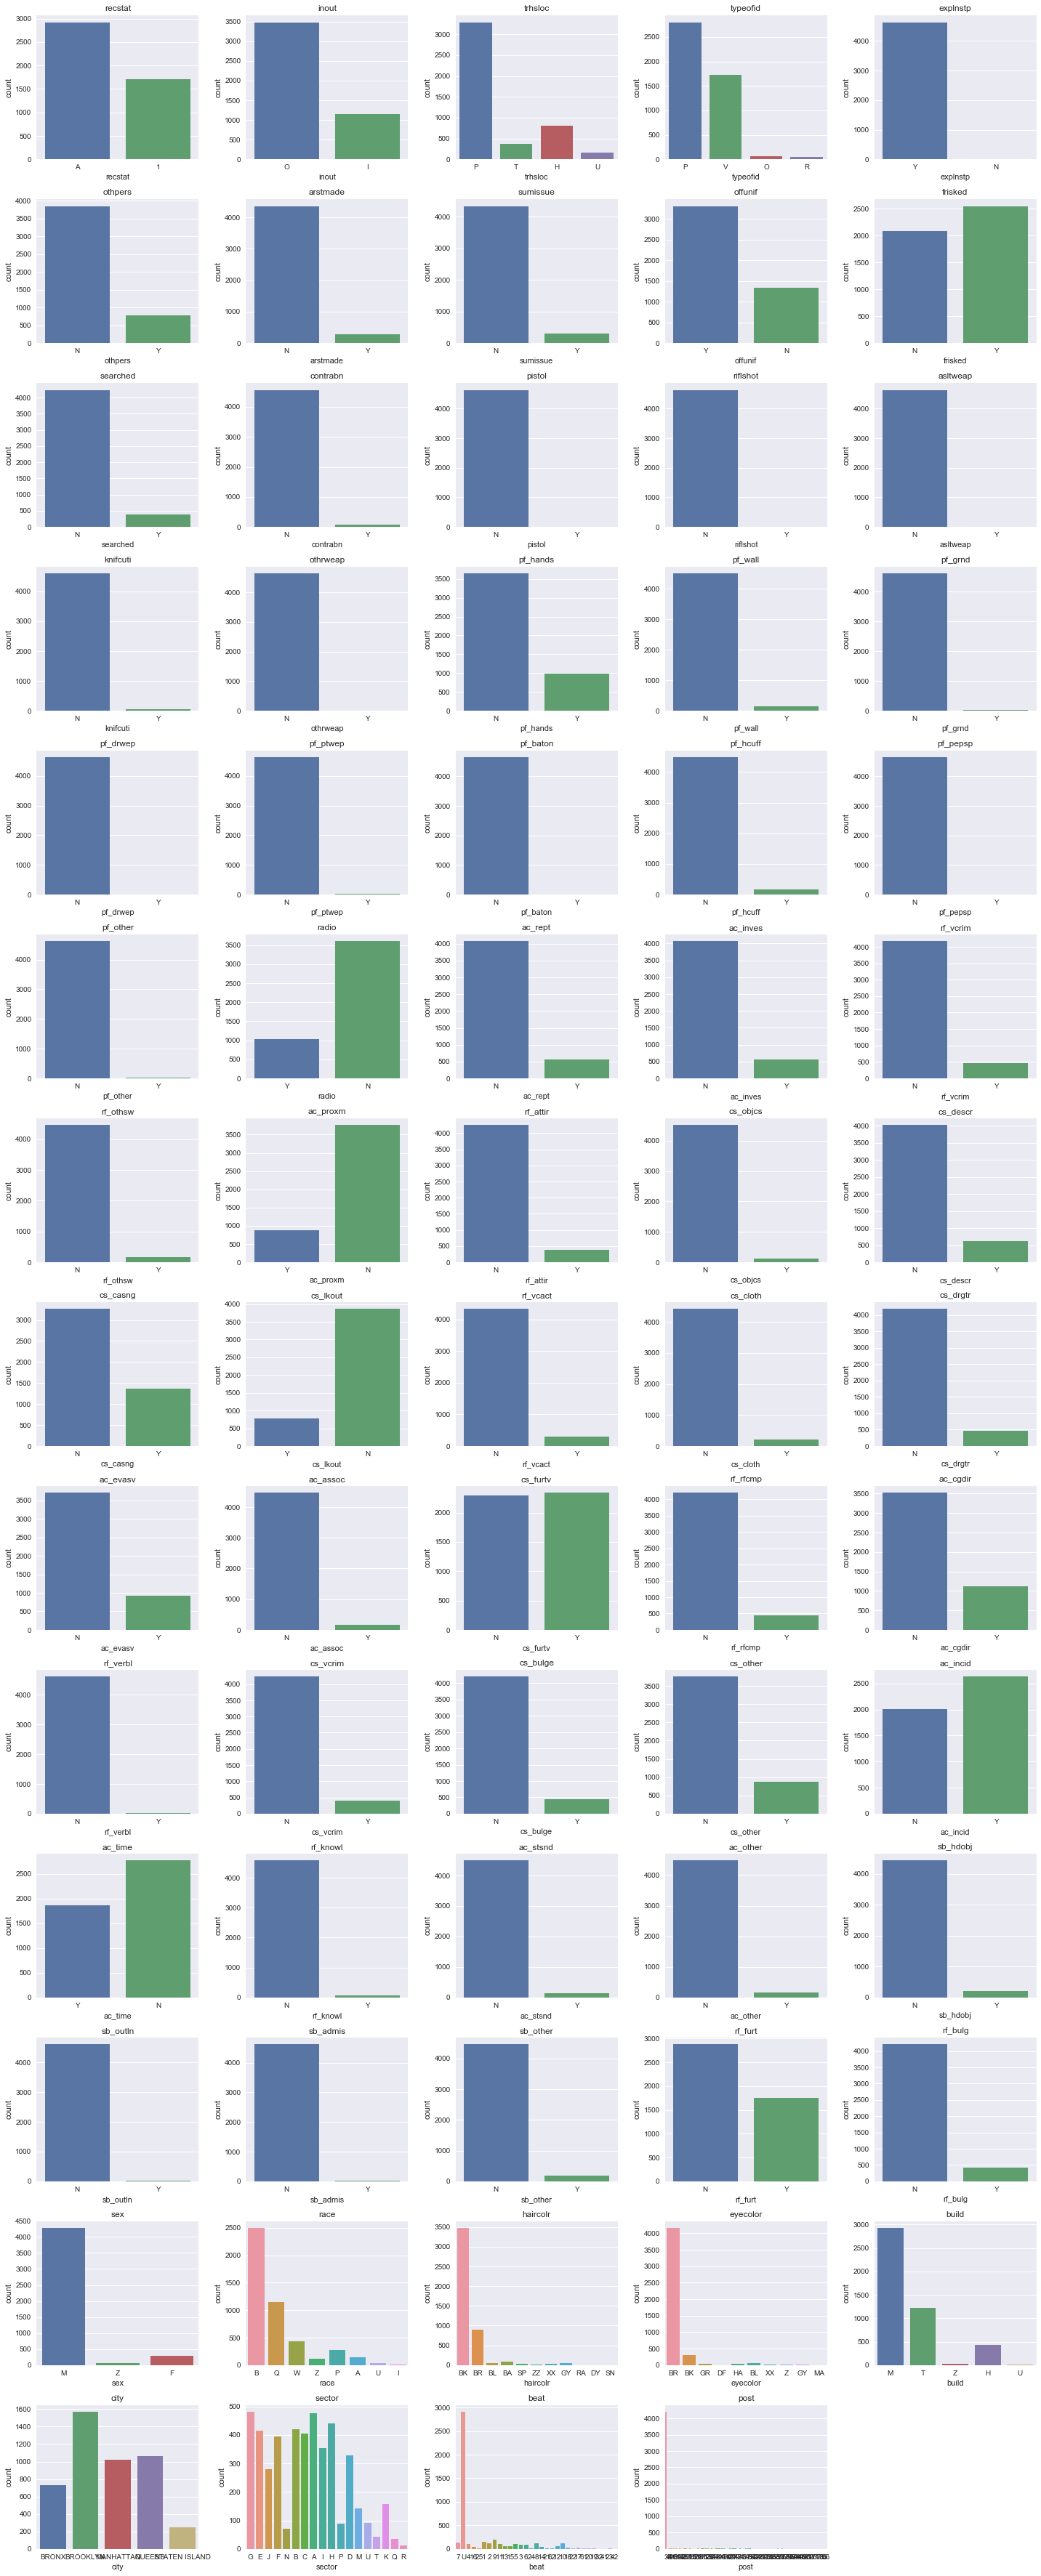

In [72]:
plt.figure(figsize=(20,70))
obj_cols = df.select_dtypes(include=['object']).columns
for n, i in enumerate(df[obj_cols].columns):
    plt.subplot(20, 5, n + 1)
    sns.countplot(df[i])
    plt.title(i)
    plt.tight_layout()

### Vector objetivo

N    0.939387
Y    0.060613
Name: arstmade, dtype: float64

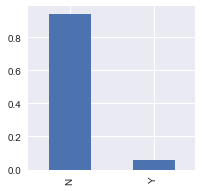

In [73]:
plt.rcParams["figure.figsize"] = (3, 3)
df['arstmade'].value_counts('%').plot(kind='bar')
df['arstmade'].value_counts('%')

Observamos que el vector objetivo se encuentra muy desbalanceado entre clases positivas (6%) y negativas (94%)

para recodificar las variables se usara encoderlabel para todos los atributoas con un sufijo de label, asi podremos control facilmente la interpretacion.

In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for index, (colname, serie) in enumerate(df.iteritems()):
    df[colname + '_label'] = le.fit(serie).transform(serie)

In [75]:
df_labeled = df.iloc[:,74:]
df_labeled.head()

,typeofid_label,explnstp_label,othpers_label,arstmade_label,sumissue_label,offunif_label,frisked_label,searched_label,contrabn_label,pistol_label,...,race_label,haircolr_label,eyecolor_label,build_label,city_label,sector_label,beat_label,post_label,month_label,meters_label
0,1,1,0,0,0,1,0,0,0,0,...,1,1,2,1,0,6,27,0,3,14
2,3,1,0,0,0,0,1,0,0,0,...,4,3,2,1,0,4,30,0,9,19
3,1,1,0,0,0,1,0,0,0,0,...,1,1,2,2,1,9,20,29,11,10
5,3,1,0,0,0,0,1,0,0,0,...,1,1,2,1,2,5,7,0,4,13
6,1,1,0,0,0,1,1,1,0,0,...,1,1,2,2,1,12,30,0,10,6


### Grillas de hiperparámetros